In [1]:
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
k=2

In [2]:
X=[[2,3],[2,4],[8,9],[7,8],[1,2],[8,8],[9,7],[2,2]]
Y=np.array(X)

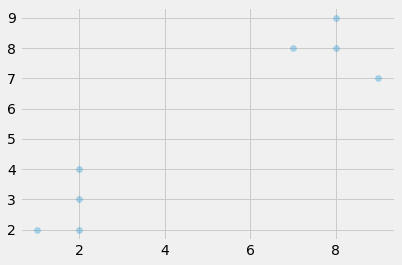

In [3]:
style.use('fivethirtyeight')
plt.scatter(Y[:, 0], Y[:, 1], alpha=0.3)
plt.show()

In [4]:
def recalculate_clusters(X, centroids, k):
    """ Recalculates the clusters """
    # Initiate empty clusters
    clusters = {}
    # Set the range for value of k (number of centroids)
    for i in range(k):
        clusters[i] = []
    # Setting the plot points using dataframe (X) and the vector norm (magnitude/length)
    for data in X:
        # Set up list of euclidian distance and iterate through
        euc_dist = []
        for j in range(k):
            euc_dist.append(np.linalg.norm(data - centroids[j]))
        # Append the cluster of data to the dictionary
        clusters[euc_dist.index(min(euc_dist))].append(data)
    return clusters    
 
def recalculate_centroids(centroids, clusters, k):
    """ Recalculates the centroid position based on the plot """ 
    for i in range(k):
        # Finds the average of the cluster at given index
        centroids[i] = np.average(clusters[i], axis=0)
    return centroids

def plot_clusters(centroids, clusters, k):
    """ Plots the clusters with centroid and specified graph attributes """ 
    colors = ['red', 'blue' , 'green', 'orange', 'blue', 'gray', 'yellow', 'purple']
    plt.figure(figsize = (6, 4))  
    area = (20) ** 2
    for i in range(k):
        for cluster in clusters[i]:
            plt.scatter(cluster[0], cluster[1], c=colors[i % k], alpha=0.6)          
        plt.scatter(centroids[i][0], centroids[i][1], c='black', s=200)

def k_means_clustering(X, centroids={}, k=3, repeats=10):
    """ Calculates full k_means_clustering algorithm """
    for i in range(k):
        # Sets up the centroids based on the data
        centroids[i] = X[i]

    # Outputs the recalculated clusters and centroids 
    print(f'First and last of {repeats} iterations')
    for i in range(repeats):        
        clusters = recalculate_clusters(X, centroids, k)  
        centroids = recalculate_centroids(centroids, clusters, k)

        # Plot the first and last iteration of k_means given the repeats specified
        # Default is 10, so this would output the 1st iteration and the 10th
        if i == range(repeats)[-1] or i == range(repeats)[0]:
            plot_clusters(centroids, clusters, k)

First and last of 10 iterations


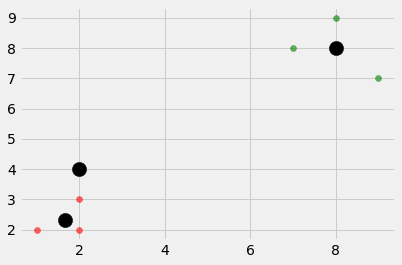

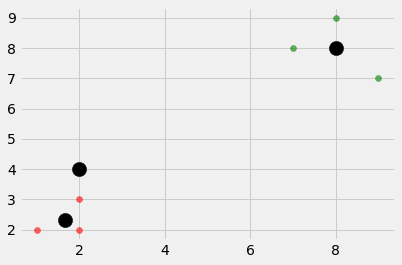

In [5]:
k_means_clustering(Y)